<a href="https://www.kaggle.com/code/aezersx/welding-defect-object-detection-yolov8?scriptVersionId=191341629" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
%%capture
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


# Import all required packages

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.73 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5771.7/8062.4 GB disk)


In [4]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()

# Train the Model

In [5]:
!yolo task=detect mode=train model=yolov8m.pt data="/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/data.yaml" epochs=100 imgsz=640

100%|███████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 131MB/s]
Ultralytics YOLOv8.2.73 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/kaggle/input/welding-defect-object-detection/The Welding Defect Dataset - v2/The Welding Defect Dataset - v2/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnos

# Seeing the metrics used in YOLO

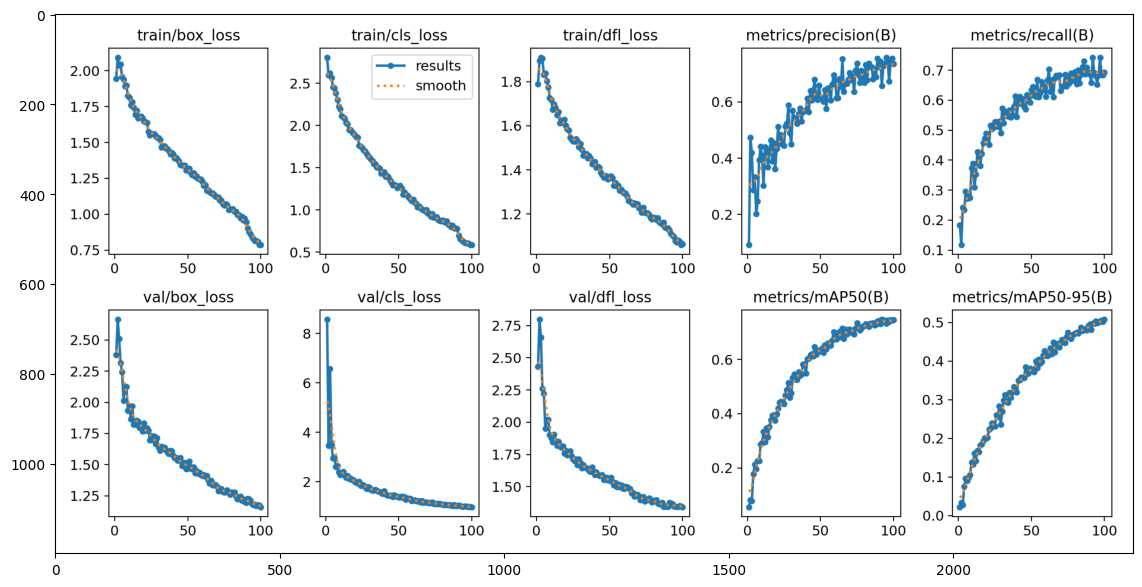

In [6]:
import matplotlib.pyplot as plt

from matplotlib import image
%matplotlib inline
metrics=image.imread('/kaggle/working/runs/detect/train/results.png')
plt.figure(figsize=(15,7))
plt.imshow(metrics)
plt.show()

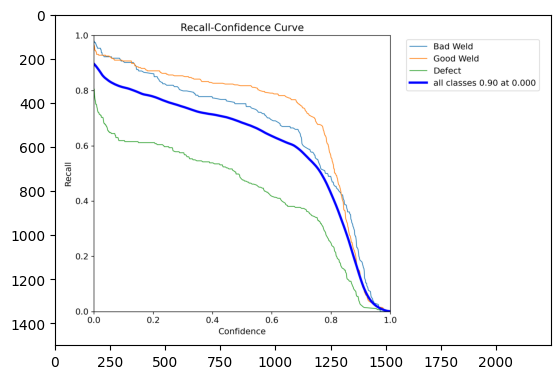

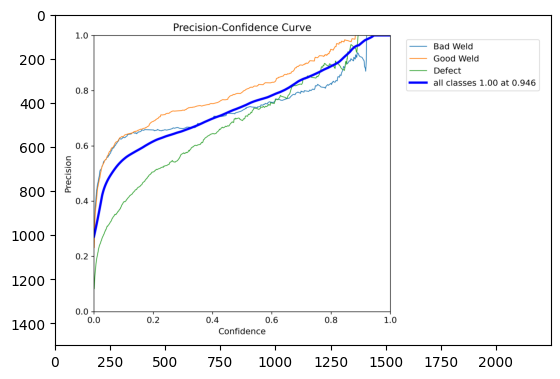

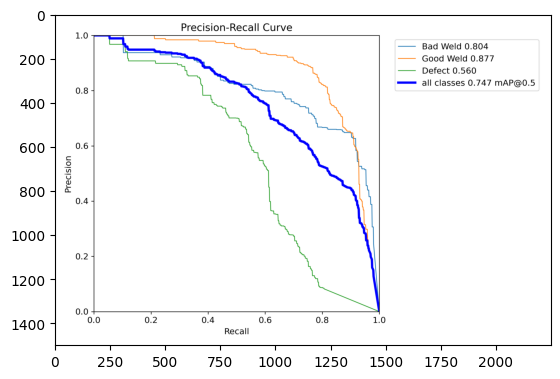

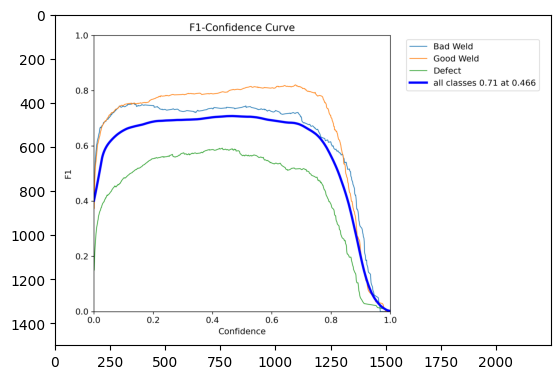

In [8]:
curves=['R_curve','P_curve','PR_curve','F1_curve']
for curve in curves:
    img=image.imread('/kaggle/working/runs/detect/train/'+curve+'.png')
    plt.imshow(img)
    plt.show()

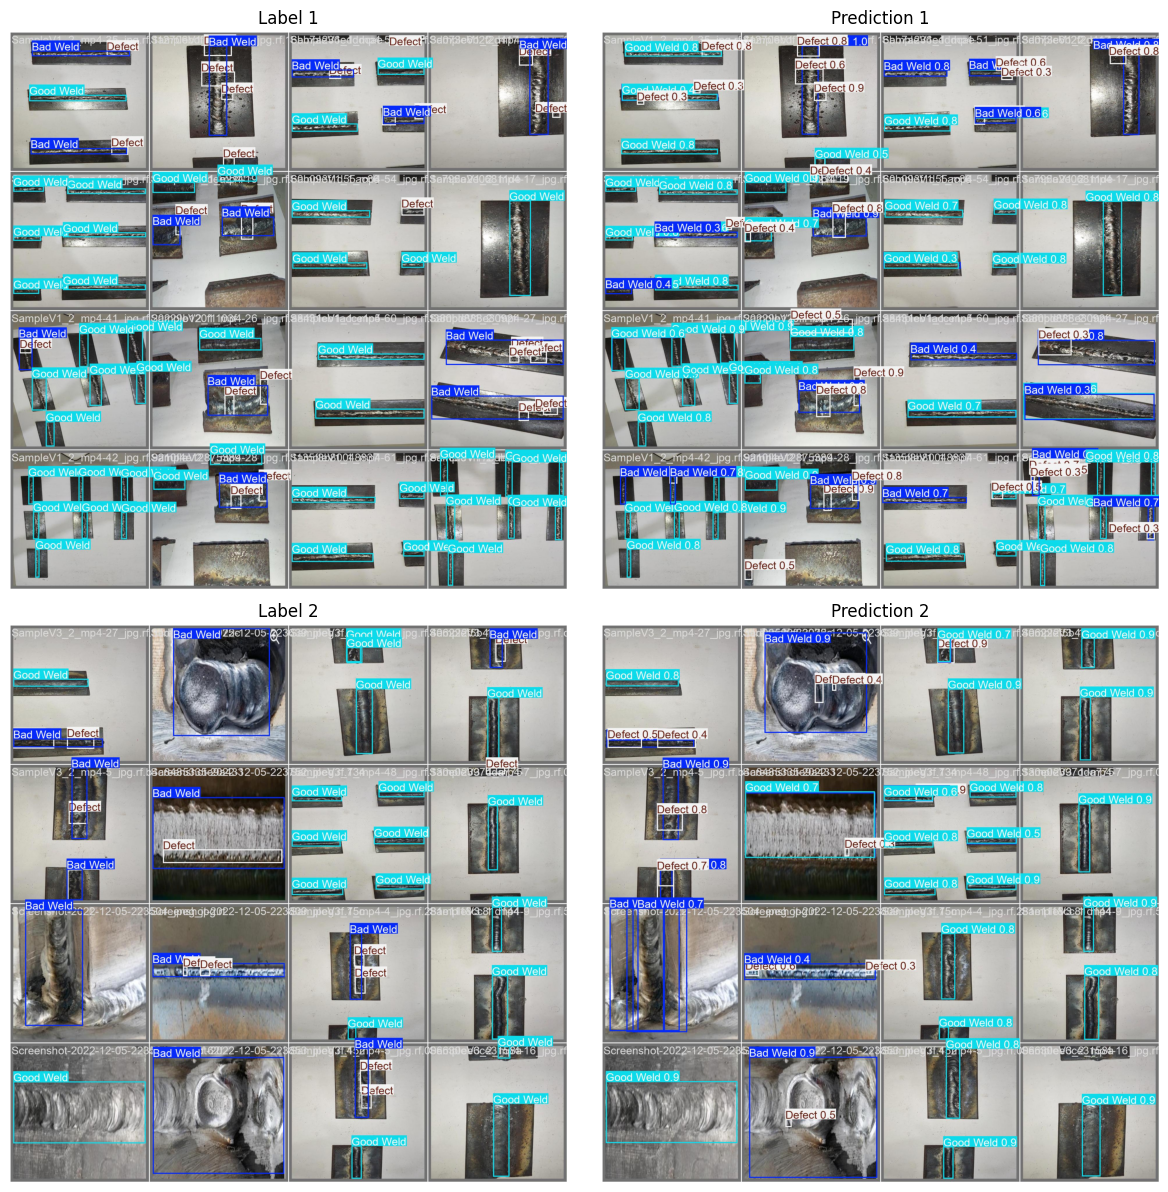

In [9]:
# Read images
label1 = plt.imread('/kaggle/working/runs/detect/train/val_batch1_labels.jpg')
label2 = plt.imread('/kaggle/working/runs/detect/train/val_batch2_labels.jpg')
pred1 = plt.imread('/kaggle/working/runs/detect/train/val_batch1_pred.jpg')
pred2 = plt.imread('/kaggle/working/runs/detect/train/val_batch2_pred.jpg')

# Create subplots with increased figure size
fig, axarr = plt.subplots(2, 2, figsize=(12, 12))

# Display images with titles and remove axis numbers
axarr[0, 0].imshow(label1)
axarr[0, 0].set_title('Label 1')
axarr[0, 0].axis('off')

axarr[0, 1].imshow(pred1)
axarr[0, 1].set_title('Prediction 1')
axarr[0, 1].axis('off')

axarr[1, 0].imshow(label2)
axarr[1, 0].set_title('Label 2')
axarr[1, 0].axis('off')

axarr[1, 1].imshow(pred2)
axarr[1, 1].set_title('Prediction 2')
axarr[1, 1].axis('off')

# Adjust layout with reduced padding
plt.tight_layout(pad=1)
plt.show()

# Test with images from the internet

In [14]:
!wget https://dycoventures.com/cdn/shop/articles/Types_of_Visual_Welding_Defects_1200x630.png

--2024-08-06 03:27:39--  https://dycoventures.com/cdn/shop/articles/Types_of_Visual_Welding_Defects_1200x630.png
Resolving dycoventures.com (dycoventures.com)... 23.227.38.65, 2620:127:f00f:5::
Connecting to dycoventures.com (dycoventures.com)|23.227.38.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 890949 (870K) [image/png]
Saving to: 'Types_of_Visual_Welding_Defects_1200x630.png'

Types_of_Visual_Wel 100%[===================>] 870.07K  --.-KB/s    in 0.08s   

2024-08-06 03:27:40 (10.6 MB/s) - 'Types_of_Visual_Welding_Defects_1200x630.png' saved [890949/890949]




image 1/1 /kaggle/working/Types_of_Visual_Welding_Defects_1200x630.png: 448x640 4 Bad Welds, 1 Defect, 65.6ms
Speed: 4.2ms preprocess, 65.6ms inference, 160.7ms postprocess per image at shape (1, 3, 448, 640)


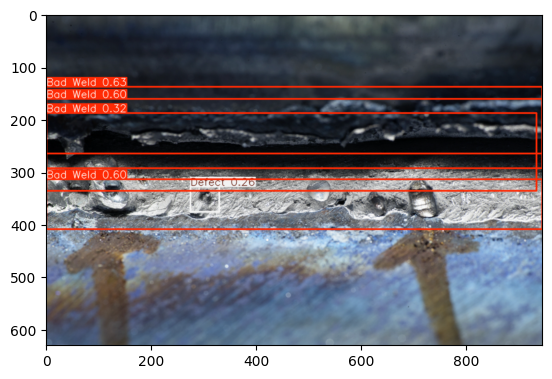

In [15]:
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

results = model("/kaggle/working/Types_of_Visual_Welding_Defects_1200x630.png")

# show the image result with matplotlib with bounding box
plt.imshow(results[0].plot())
plt.show()